## Meme Kanseri Tespit Datası

Bu veri setindeki özellikler, bir meme kitlesinin ince iğne aspirasyonu (FNA) sırasında elde edilen sayısallaştırılmış bir görüntüden hesaplanmıştır. Özellikler, görüntüdeki hücre çekirdeklerinin özelliklerini tanımlar.

1.ID numarası

2.Teşhis (Diagnosis): M = Malignant (Kötü huylu) B = Benign (İyi huylu)
 
3.Hücre çekirdeği için hesaplanan on gerçek değerli özellik:

 - Radius (Yarıçap): Merkezden çevre üzerindeki noktalara olan mesafelerin ortalaması
 - Texture (Doku): Gri tonlama değerlerinin standart sapması
 - Perimeter (Çevre): Çekirdeğin çevresi
 - Area (Alan): Çekirdek alanı
 - Smoothness (Pürüzsüzlük): Yarıçap uzunluklarındaki yerel varyasyon
 - Compactness (Kompaktlık): (Çevre^2 / Alan) - 1.0
 - Concavity (Çöküklük): Kontur üzerindeki çökük kısımların şiddeti
 - Concave Points (Çökük Noktalar): Kontur üzerindeki çökük kısımların sayısı
 - Symmetry (Simetri): Çekirdek simetrisi
 - Fractal Dimension (Fraktal Boyut): “Sahil şeridi yaklaşımı” - 1

Her bir özellik, aşağıdaki istatistiklerle hesaplanmıştır:
- Mean (Ortalama): Özelliğin ortalama değeri
- Standard Error (Standart Hata): Özelliğin standart hata değeri
- Worst (En Kötü): Özelliğin en kötü (en büyük) değeri

Bu istatistikler sonucunda toplam 30 özellik oluşturulmuştur.

357 örnek: Benign (İyi Huylu)

212 örnek: Malignant (Kötü Huylu)

Kullanacağım kütüphaneler:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# ConvergenceWarning uyarılarını bastırmak için
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

Veri setini inceleyelim:

In [2]:
BC_wisconsin = pd.read_csv('data.csv')
BC_wisconsin

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
BC_wisconsin.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Veri setinde nan değerlerinden oluşan Unnamed: 32 adında hatalı bir sütun var. Bu sütunu çıkarıyorum:

In [4]:
BC_wisconsin.drop(["Unnamed: 32"], axis = 1, inplace = True)

Hasta id'lerinin analizime bir katkısı olmayacağını düşündüğüm için o sütunu da çıkarıyorum.

In [5]:
BC_wisconsin.drop(["id"], axis = 1, inplace = True)

Eksik değer var mı bakalım

In [6]:
BC_wisconsin.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Eksik değer yok. Meme kanseri tespit problemi, ikili sınıflandırma problemi olduğundan diagnosis(teşhis) sütununu binary olarak kodluyorum. (M -> 1, B -> 0)

In [7]:
BC_wisconsin['diagnosis'] = BC_wisconsin['diagnosis'].map({'M': 1, 'B': 0})

Eğitim ve test kümesini ayırmak için bağımlı, bağımsız değişkeni tanımlayalım:

In [8]:
y = BC_wisconsin['diagnosis']
X = BC_wisconsin.drop(['diagnosis'], axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22)

Train ve test setlerinin boyutlarını görmek için:

In [10]:
X_train.shape
X_test.shape

(114, 30)

### LOJİSTİK REGRESYON

In [26]:
logReg = LogisticRegression(random_state = 22, max_iter=5000).fit(X_train, y_train)

Tahminleri oluşturalım:

In [27]:
# eğitim seti için
pred_logreg_train = logReg.predict(X_train)
pred_lojreg_train[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [28]:
# test seti için
pred_logreg_test = logReg.predict(X_test)
pred_logreg_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

Eğitim seti tahmin sonuçları ve metrikler:

In [29]:
pred_logreg_train_proba = logReg.predict_proba(X_train)
pred_logreg_train_proba[0:10]

array([[1.14179376e-03, 9.98858206e-01],
       [1.31260300e-08, 9.99999987e-01],
       [5.01545169e-01, 4.98454831e-01],
       [9.90409894e-01, 9.59010550e-03],
       [5.21724604e-01, 4.78275396e-01],
       [9.99763541e-01, 2.36459285e-04],
       [9.99753564e-01, 2.46435655e-04],
       [7.54266788e-04, 9.99245733e-01],
       [9.80778140e-08, 9.99999902e-01],
       [9.15692209e-01, 8.43077910e-02]])

In [30]:
confusion_matrix(y_train, pred_logreg_train)

array([[278,   8],
       [ 12, 157]])

In [31]:
accuracy_score(y_train, pred_logreg_train)

0.9560439560439561

In [32]:
print(classification_report(y_train, pred_logreg_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       286
           1       0.95      0.93      0.94       169

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



Test seti tahmin sonuçları ve metrikler:

In [33]:
pred_logreg_test_proba = logReg.predict_proba(X_test)
pred_logreg_test_proba[0:10]

array([[9.94705827e-01, 5.29417334e-03],
       [1.46722967e-09, 9.99999999e-01],
       [3.27109968e-04, 9.99672890e-01],
       [6.56947962e-05, 9.99934305e-01],
       [8.42859809e-01, 1.57140191e-01],
       [9.99585788e-01, 4.14212341e-04],
       [9.68006452e-01, 3.19935485e-02],
       [9.89648800e-01, 1.03512000e-02],
       [9.61753013e-01, 3.82469872e-02],
       [9.99999588e-01, 4.11732588e-07]])

In [34]:
confusion_matrix(y_test, pred_logreg_test)

array([[70,  1],
       [ 4, 39]])

In [35]:
accuracy_score(y_test, pred_logreg_test)

0.956140350877193

In [36]:
print(classification_report(y_test, pred_logreg_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Eğitim ve test seti için ROC eğrisi çizdirelim:

Eğitim seti için:

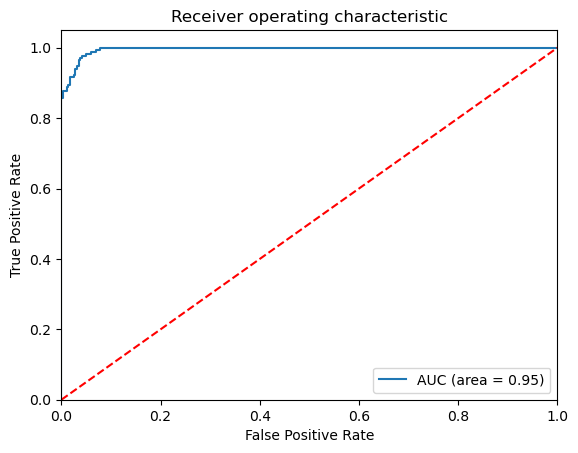

In [37]:
logit_roc_auc = roc_auc_score(y_train, pred_logreg_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_logreg_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('log_ROC')
plt.show()

ROC eğrisi altında kalan alan 0.95

Test seti için:

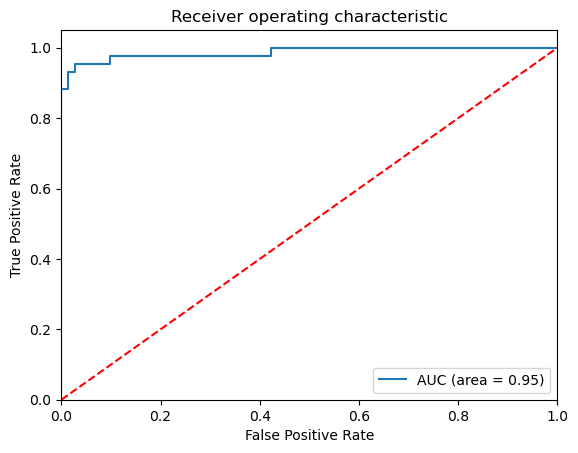

In [38]:
logit_roc_auc = roc_auc_score(y_test, pred_logreg_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_logreg_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('log_ROC')
plt.show()

ROC eğrisi altında kalan alan 0.95, hem eğitim hem de test setinde değerler iyi çıktı.

GridSearch Düzenlemesi Yapalım:

In [41]:
logReg_params = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
logRegFCV = LogisticRegression(random_state = 22)
logReg_CVGS = GridSearchCV(logRegFCV, logReg_params,cv = 5, n_jobs=-1, verbose=0).fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [42]:
logReg_CVGS.best_params_

{'solver': 'lbfgs'}

In [43]:
logReg_Tuned = LogisticRegression(solver='newton-cg', random_state = 22).fit(X_train, y_train)

In [44]:
pred_lojreg_tuned_train = logReg_Tuned.predict(X_train)
pred_lojreg_tuned_test = logReg_Tuned.predict(X_test)

In [45]:
accuracy_score(y_train, pred_lojreg_tuned_train)

0.9560439560439561

GridSearch ile optimizasyon yaptıktan sonra accuracy score'unda hiçbir şey değişmedi. maxiter sayısı lojistik regresyonda 1000 ikenve gridsearchünki 5000 iken trainset accuracy scoreunda bir fark vardı ancak ikisini de 5000 yapınca tamamen trainset accuracy scoreu eşitlendi. bunun sebebi gridsearch bana daha iyi bir model bulmamış sadece lojistik regresyonun daha iyi yakınsamasını(convergence) sağlamış. ben de maxiter'i 5000'e çıkarınca gridsearch ün sağladığı avantajı manuel olarak aynen  elde etmiş olmuşum.
maxiter, modelin optimizasyon algoritmasına tanınan iterasyon sayısıdır. arttıkça model optimum katsayılara daha iyi ulaşır. bu model kapasitesini arttırmaz sadece daha iyi çözüm bulmasını sağlar.

GridSearchCV ile yapılan hiperparametre optimizasyonu sonucunda eğitim seti doğruluğunda küçük bir artış gözlemlenmiştir. Ancak bu artışın temel nedeni modelin yapısal olarak daha karmaşık hale gelmesi değil, lojistik regresyon algoritmasının daha yüksek max_iter değeri ile daha iyi yakınsamasıdır. Lojistik regresyon modelinde iterasyon sayısı manuel olarak artırıldığında, GridSearch sonucu ile benzer doğruluk değerleri elde edilmiştir. Bu durum, model performansındaki iyileşmenin optimizasyon sürecinin daha etkin çalışmasından kaynaklandığını göstermektedir.

In [46]:
accuracy_score(y_test, pred_lojreg_tuned_test)

0.956140350877193

test set de tamamen aynı çıktı.

### KARAR AĞAÇLARI İLE SINIFLANDIRMA

Model oluşturup tahmin ve metrikleri inceleyelim.

In [47]:
dTree_Class = DecisionTreeClassifier(random_state = 22).fit(X_train, y_train)

Train set tahminleri:

In [48]:
pred_dtreeclass_train = dTree_Class.predict(X_train)
pred_dtreeclass_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [49]:
pred_dtreeclass_train_proba = dTree_Class.predict_proba(X_train)
pred_dtreeclass_train_proba[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [50]:
confusion_matrix(y_train, pred_dtreeclass_train)

array([[286,   0],
       [  0, 169]])

In [51]:
accuracy_score(y_train, pred_dtreeclass_train)

1.0

accuracy skorun 1 çıkması overfitting işaretidir.

In [52]:
print(classification_report(y_train, pred_dtreeclass_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test set tahminleri:

In [53]:
pred_dtreeclass_test = dTree_Class.predict(X_test)
pred_dtreeclass_test[0:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [54]:
pred_dtreeclass_test_proba = dTree_Class.predict_proba(X_test)
pred_dtreeclass_test_proba[0:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [55]:
confusion_matrix(y_test, pred_dtreeclass_test)

array([[67,  4],
       [ 3, 40]])

In [56]:
accuracy_score(y_test, pred_dtreeclass_test)

0.9385964912280702

test seti accuracy skoru 0.93. Hala aşırı öğrenme işareti

In [57]:
print(classification_report(y_test, pred_dtreeclass_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Eğitim ve test seti için ROC eğrisi çizdirelim:

Eğitim seti:

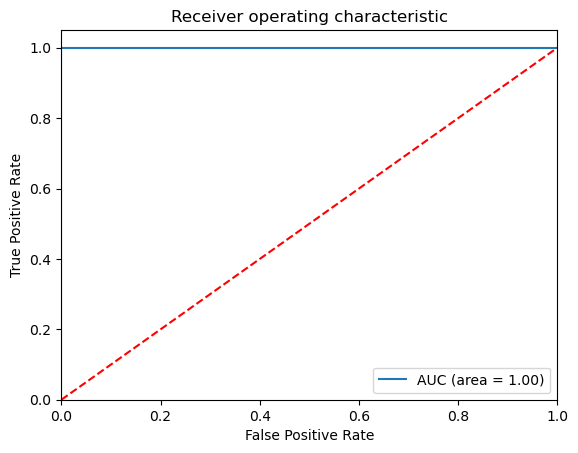

In [58]:
dTree_Class_roc_auc = roc_auc_score(y_train, pred_dtreeclass_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_dtreeclass_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % dTree_Class_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('dTree_ROC')
plt.show()

Test seti:

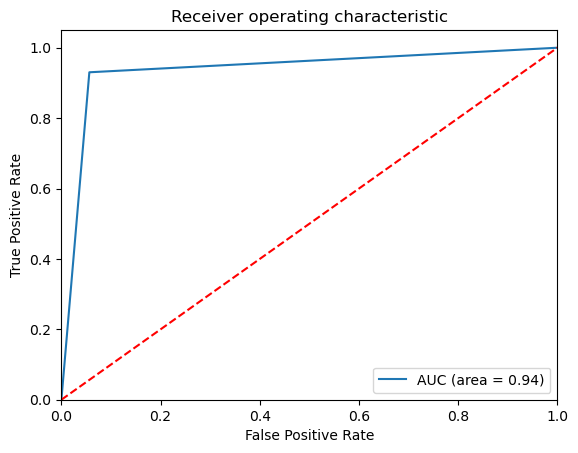

In [59]:
dTree_Class_roc_auc = roc_auc_score(y_test, pred_dtreeclass_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_dtreeclass_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % dTree_Class_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('dTree_ROC')
plt.show()

GridSearch Düzenlemesi yapalım

In [60]:
dTree_Class_params = {'max_depth': [1,3,5,8,10],'min_samples_split': [2,3,5,10,20,50]}
dtreeclassFCV = DecisionTreeClassifier(random_state = 22)
dtreeclass_CVGS = GridSearchCV(dtreeclassFCV, dTree_Class_params,cv = 5, n_jobs=-1, verbose=0).fit(X_train, y_train)

In [61]:
dtreeclass_CVGS.best_params_

{'max_depth': 8, 'min_samples_split': 10}

In [62]:
dTree_Class_Tuned = DecisionTreeClassifier(max_depth=8, min_samples_split=10,random_state = 22).fit(X_train, y_train)

Eğitim seti için tahminler:

In [63]:
pred_dtreeclass_tuned_train = dTree_Class_Tuned.predict(X_train)
pred_dtreeclass_tuned_train[0:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [64]:
pred_dtreeclass_tuned_train_proba = dTree_Class_Tuned.predict_proba(X_train)
pred_dtreeclass_tuned_train_proba[0:10]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [65]:
confusion_matrix(y_train, pred_dtreeclass_tuned_train)

array([[284,   2],
       [  3, 166]])

In [66]:
accuracy_score(y_train, pred_dtreeclass_tuned_train)

0.989010989010989

In [67]:
print(classification_report(y_train, pred_dtreeclass_tuned_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



Test seti için:

In [68]:
pred_dtreeclass_tuned_test = dTree_Class_Tuned.predict(X_test)
pred_dtreeclass_tuned_test[0:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [69]:
pred_dtreeclass_tuned_test_proba = dTree_Class_Tuned.predict_proba(X_test)
pred_dtreeclass_tuned_test_proba[0:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [70]:
confusion_matrix(y_test, pred_dtreeclass_tuned_test)

array([[67,  4],
       [ 2, 41]])

In [71]:
accuracy_score(y_test, pred_dtreeclass_tuned_test)

0.9473684210526315

GridSearch optimizasyonu yapıldıktan sonra eğitim seti accuracy skoru azalırken test seti arttı. Bu durum, modelin overfitting yapmadığını ve test verisinde genelleme yapabildiğini gösterir.

In [72]:
print(classification_report(y_test, pred_dtreeclass_tuned_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Eğitim ve test set için ROC eğrisi çizdirelim

Eğitim için:

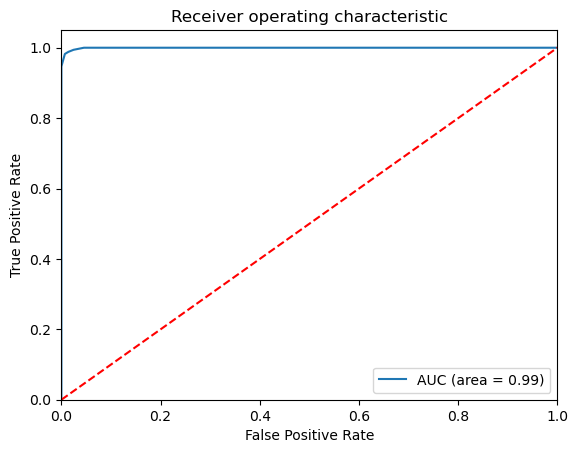

In [73]:
dTree_Class_Tuned_roc_auc = roc_auc_score(y_train, pred_dtreeclass_tuned_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_dtreeclass_tuned_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % dTree_Class_Tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('dTree_Tuned_ROC')
plt.show()

Test seti için:

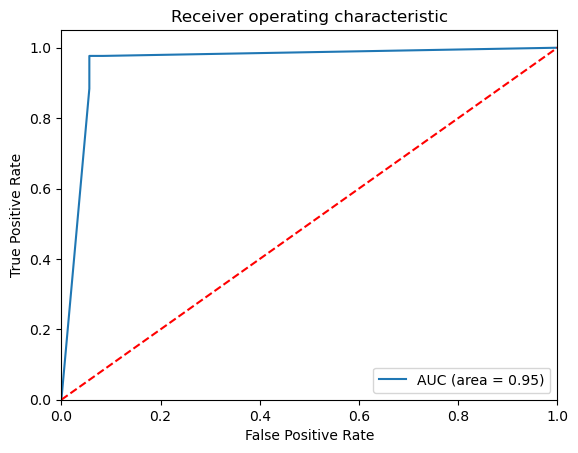

In [74]:
dTree_Class_Tuned_roc_auc = roc_auc_score(y_test, pred_dtreeclass_tuned_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_dtreeclass_tuned_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % dTree_Class_Tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('dTree_Tuned_ROC')
plt.show()

### SINIFLAMA İÇİN KNN ANALİZİ

Model oluşturup tahminlere ve metriklere bakalım

In [75]:
kNN_class = KNeighborsClassifier().fit(X_train, y_train)

In [76]:
pred_knn_train = kNN_class.predict(X_train)
pred_knn_train[0:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [77]:
pred_knn_train_proba = kNN_class.predict_proba(X_train)
pred_knn_train_proba[0:10]

array([[0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6]])

In [78]:
confusion_matrix(y_train, pred_knn_train)

array([[279,   7],
       [ 17, 152]])

In [79]:
accuracy_score(y_train, pred_knn_train)

0.9472527472527472

In [80]:
print(classification_report(y_train, pred_knn_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       286
           1       0.96      0.90      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



In [81]:
pred_knn_test = kNN_class.predict(X_test)
pred_knn_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [82]:
pred_knn_test_proba = kNN_class.predict_proba(X_test)
pred_knn_test_proba[0:10]

array([[0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [83]:
confusion_matrix(y_test, pred_knn_test)

array([[68,  3],
       [ 6, 37]])

In [84]:
accuracy_score(y_test, pred_knn_test)

0.9210526315789473

In [85]:
print(classification_report(y_test, pred_knn_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Eğitim ve test set için ROC eğrisi çizdirelim:

Eğitim seti için:

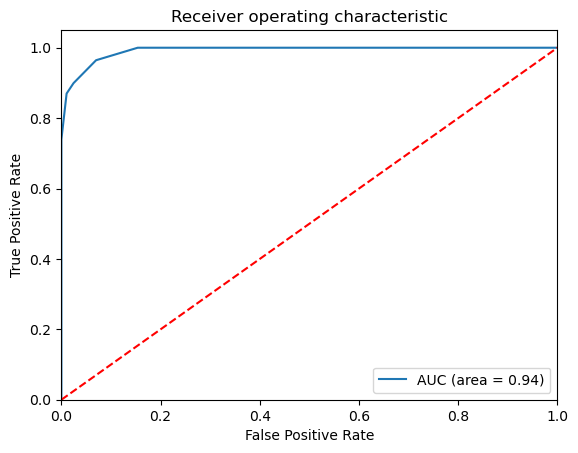

In [86]:
knn_roc_auc = roc_auc_score(y_train, pred_knn_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_knn_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('knn_ROC')
plt.show()

Test seti için:

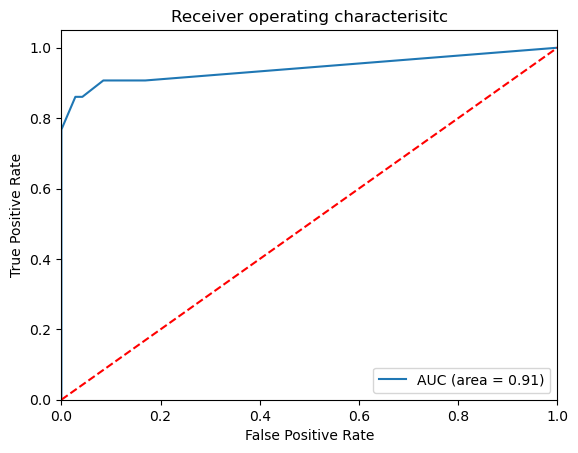

In [87]:
knn_roc_auc = roc_auc_score(y_test, pred_knn_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_knn_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterisitc')
plt.legend(loc = 'lower right')
plt.savefig('knn_ROC')
plt.show()

GridSearch Düzenlemesi yapalım:

In [88]:
kNN_class_params = {"n_neighbors": np.arange(1,50)}
kNN_classfCV = KNeighborsClassifier()
kNN_class_CVGS = GridSearchCV(kNN_classfCV, kNN_class_params,cv = 10,n_jobs=-1,verbose=0).fit(X_train, y_train)

In [89]:
kNN_class_CVGS.best_params_

{'n_neighbors': 5}

In [90]:
kNN_class_Tuned = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikler:

In [91]:
pred_knn_tuned_train = kNN_class_Tuned.predict(X_train)
pred_knn_tuned_train[0:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [92]:
pred_knn_tuned_train_proba = kNN_class_Tuned.predict_proba(X_train)
pred_knn_tuned_train_proba[0:10]

array([[0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6]])

In [93]:
confusion_matrix(y_train, pred_knn_tuned_train)

array([[279,   7],
       [ 17, 152]])

In [94]:
accuracy_score(y_train, pred_knn_tuned_train)

0.9472527472527472

In [95]:
print(classification_report(y_train, pred_knn_tuned_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       286
           1       0.96      0.90      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



Test seti için:

In [96]:
pred_knn_tuned_test = kNN_class_Tuned.predict(X_test)
pred_knn_tuned_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [97]:
pred_knn_tuned_test_proba = kNN_class_Tuned.predict_proba(X_test)
pred_knn_tuned_test_proba[0:10]

array([[0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [98]:
confusion_matrix(y_test, pred_knn_tuned_test)

array([[68,  3],
       [ 6, 37]])

In [99]:
accuracy_score(y_test, pred_knn_tuned_test)

0.9210526315789473

In [100]:
print(classification_report(y_test, pred_knn_tuned_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Eğitim ve test set için ROC eğrisi çizdirelim

Eğitim seti için:

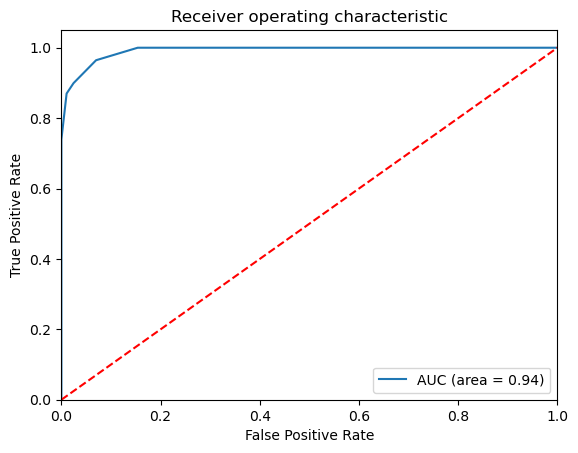

In [101]:
knn_tuned_roc_auc = roc_auc_score(y_train, pred_knn_tuned_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_knn_tuned_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('knn_tuned_ROC')
plt.show()

Test seti için:

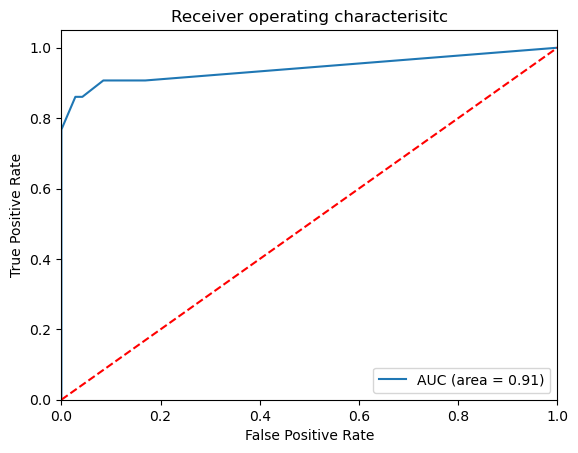

In [102]:
knn_tuned_roc_auc = roc_auc_score(y_test, pred_knn_tuned_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_knn_tuned_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterisitc')
plt.legend(loc = 'lower right')
plt.savefig('knn_tuned_ROC')
plt.show()

KNN yapıldığında gridsearch optimizasyonu modelin performansında bir değişiklik yaratmadı.

### SINIFLAMA İÇİN RANDOM FOREST

In [103]:
rndf_Class = RandomForestClassifier(random_state = 22).fit(X_train,y_train)

Tahmin ve metrikler:

Eğitim seti için

In [104]:
pred_rndf_train = rndf_Class.predict(X_train)
pred_rndf_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [105]:
pred_rndf_train_proba = rndf_Class.predict_proba(X_train)
pred_rndf_train_proba[0:10]

array([[0.06, 0.94],
       [0.02, 0.98],
       [0.38, 0.62],
       [0.99, 0.01],
       [0.14, 0.86],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.98, 0.02]])

In [106]:
confusion_matrix(y_train, pred_rndf_train)

array([[286,   0],
       [  0, 169]])

In [107]:
accuracy_score(y_train, pred_rndf_train)

1.0

In [108]:
print(classification_report(y_train, pred_rndf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için

In [109]:
pred_rndf_test = rndf_Class.predict(X_test)
pred_rndf_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [110]:
pred_rndf_test_proba = rndf_Class.predict_proba(X_test)
pred_rndf_test_proba[0:10]

array([[0.76, 0.24],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.68, 0.32],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [111]:
confusion_matrix(y_test, pred_rndf_test)

array([[70,  1],
       [ 3, 40]])

In [112]:
accuracy_score(y_test, pred_rndf_test)

0.9649122807017544

In [113]:
print(classification_report(y_test, pred_rndf_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Eğitim ve test set için ROC eğrisi çizdirelim.

Eğitim seti için:

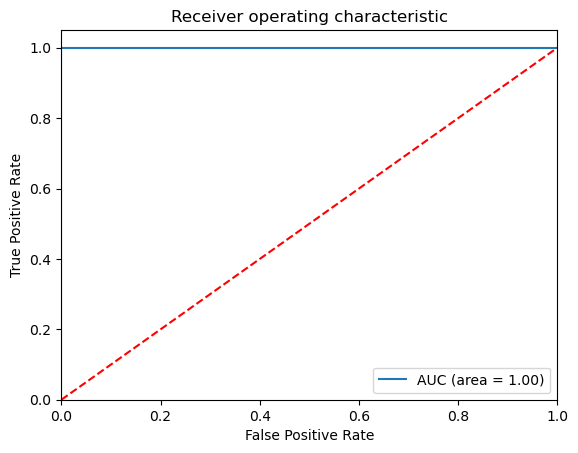

In [114]:
rndf_roc_auc = roc_auc_score(y_train, pred_rndf_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_rndf_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rndf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('rndf_ROC')
plt.show()

Test seti için:

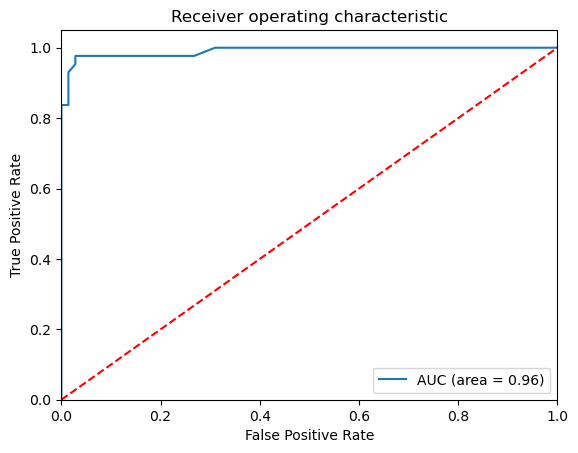

In [115]:
rndf_roc_auc = roc_auc_score(y_test, pred_rndf_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_rndf_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rndf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('rndf_ROC')
plt.show()

GridSearch Cross Validation ile model tuning yapalım:

In [116]:
rndf_Class_params = {'n_estimators': [100, 200, 500, 1000],
                     'max_features': [3, 5, 7, 8],
                     'min_samples_split': [2, 5, 10, 20]}
rndf_tuned_Class = RandomForestClassifier(max_features = 5,min_samples_split = 2,n_estimators=100,random_state=22).fit(X_train, y_train)
rndf_ClassfCV = RandomForestClassifier(random_state=22)
rndf_Class_CVGS = GridSearchCV(rndf_ClassfCV, rndf_Class_params,cv = 5,n_jobs=-1,verbose=0).fit(X_train, y_train)

In [117]:
rndf_Class_CVGS.best_params_

{'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}

In [118]:
rndf_Class_CVGS.best_score_

0.9582417582417582

In [119]:
rndf_tuned_Class = RandomForestClassifier(max_features = 7,min_samples_split = 2,n_estimators=100,random_state=22).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikleri:

In [120]:
pred_rndf_tuned_train = rndf_tuned_Class.predict(X_train)
pred_rndf_tuned_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [121]:
pred_rndf_tuned_train_proba = rndf_tuned_Class.predict_proba(X_train)
pred_rndf_tuned_train_proba[0:10]

array([[0.02, 0.98],
       [0.01, 0.99],
       [0.37, 0.63],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ]])

In [122]:
confusion_matrix(y_train, pred_rndf_tuned_train)

array([[286,   0],
       [  0, 169]])

In [123]:
accuracy_score(y_train, pred_rndf_tuned_train)

1.0

In [124]:
print(classification_report(y_train, pred_rndf_tuned_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için tahmin ve metrikler:

In [125]:
pred_rndf_tuned_test = rndf_tuned_Class.predict(X_test)
pred_rndf_tuned_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [126]:
pred_rndf_tuned_test_proba = rndf_tuned_Class.predict_proba(X_test)
pred_rndf_tuned_test_proba[0:10]

array([[0.82, 0.18],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.71, 0.29],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [127]:
confusion_matrix(y_test, pred_rndf_tuned_test)

array([[69,  2],
       [ 3, 40]])

In [128]:
accuracy_score(y_test, pred_rndf_tuned_test)

0.956140350877193

Test setindeki küçük düşüş, GridSearch'ün modeli biraz daha genel bir hale getirdiğini (daha az karmaşıklaştırdığını) gösterebilir.

In [129]:
print(classification_report(y_test, pred_rndf_tuned_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Eğitim ve test set için ROC eğrisi çizdirelim

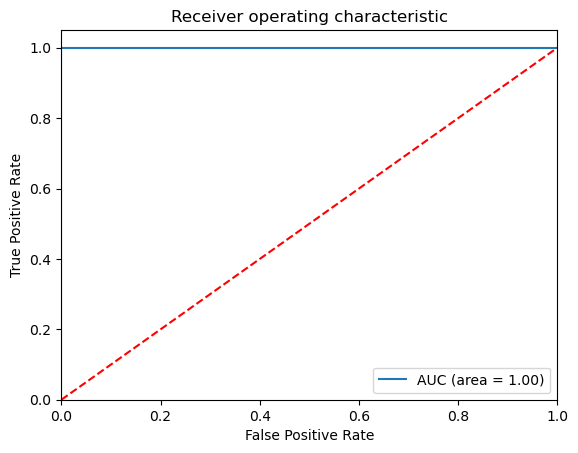

In [130]:
rndf_tuned_roc_auc = roc_auc_score(y_train, pred_rndf_tuned_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_rndf_tuned_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rndf_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('rndf_tuned_ROC')
plt.show()

Test seti için:

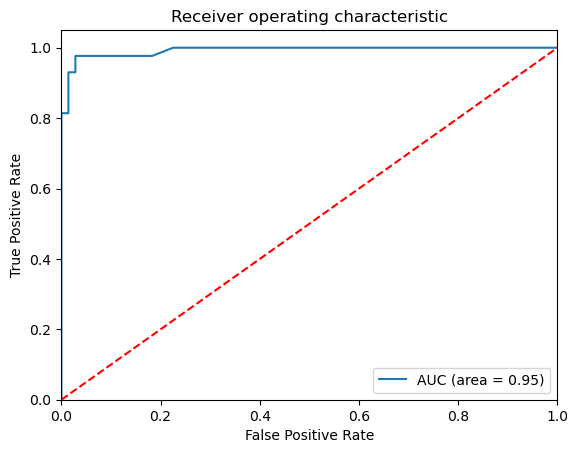

In [131]:
rndf_tuned_roc_auc = roc_auc_score(y_test, pred_rndf_tuned_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_rndf_tuned_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rndf_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('rndf_tuned_ROC')
plt.show()

### GRADIENT BOOSTING YÖNTEMİ

In [132]:
gbm_Class = GradientBoostingClassifier(random_state=22).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikler:

In [133]:
pred_gbm_train = gbm_Class.predict(X_train)
pred_gbm_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [134]:
pred_gbm_train_proba = gbm_Class.predict_proba(X_train)
pred_gbm_train_proba[0:10]

array([[2.17865957e-03, 9.97821340e-01],
       [9.99193730e-04, 9.99000806e-01],
       [2.76899623e-02, 9.72310038e-01],
       [9.99678582e-01, 3.21418116e-04],
       [1.03566941e-02, 9.89643306e-01],
       [9.99712185e-01, 2.87815499e-04],
       [9.97347019e-01, 2.65298087e-03],
       [2.10205987e-03, 9.97897940e-01],
       [5.83253612e-04, 9.99416746e-01],
       [9.98369680e-01, 1.63031981e-03]])

In [135]:
confusion_matrix(y_train, pred_gbm_train)

array([[286,   0],
       [  0, 169]])

In [136]:
accuracy_score(y_train, pred_gbm_train)

1.0

In [137]:
print(classification_report(y_train, pred_gbm_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için tahmin ve metrikler:

In [138]:
pred_gbm_test = gbm_Class.predict(X_test)
pred_gbm_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [139]:
pred_gbm_test_proba = gbm_Class.predict_proba(X_test)
pred_gbm_test_proba[0:10]

array([[9.28809267e-01, 7.11907331e-02],
       [5.38292801e-04, 9.99461707e-01],
       [5.38292801e-04, 9.99461707e-01],
       [9.03274275e-04, 9.99096726e-01],
       [9.15474735e-01, 8.45252650e-02],
       [9.99675886e-01, 3.24113672e-04],
       [9.99338787e-01, 6.61213193e-04],
       [9.99671285e-01, 3.28715460e-04],
       [9.98517110e-01, 1.48289029e-03],
       [9.99698201e-01, 3.01799469e-04]])

In [140]:
confusion_matrix(y_test, pred_gbm_test)

array([[69,  2],
       [ 3, 40]])

In [141]:
accuracy_score(y_test, pred_gbm_test)

0.956140350877193

In [142]:
print(classification_report(y_test, pred_gbm_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Eğitim ve test set için ROC eğrisi çizdirelim:

Eğitim seti için:

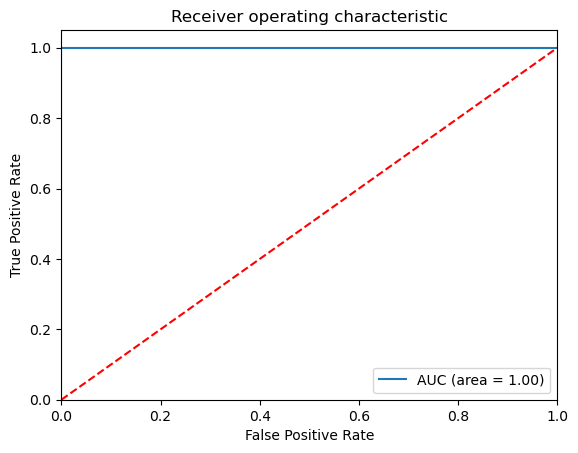

In [143]:
gbm_roc_auc = roc_auc_score(y_train, pred_gbm_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_gbm_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('gbm_ROC')
plt.show()

Test seti için:

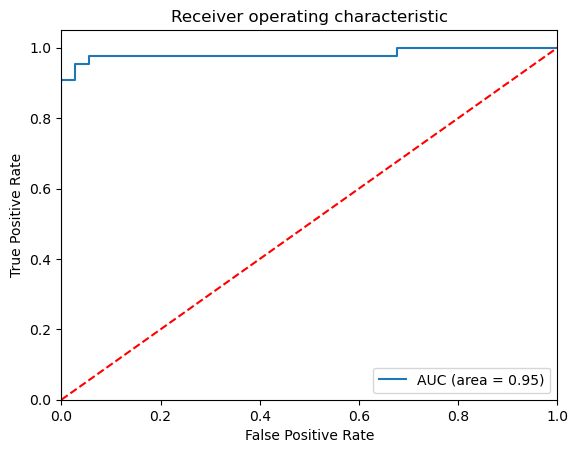

In [144]:
gbm_roc_auc = roc_auc_score(y_test, pred_gbm_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_gbm_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('gbm_ROC')
plt.show()

GridSearch Düzenlemesi yapalım

In [145]:
gbm_Class_params = {"n_estimators":[100,200,500,1000],
                     "max_depth":[2,3,5,8],
                     "learning_rate":[0.1,0.01,0.001,0.05]}
gbm_ClassfCV = GradientBoostingClassifier(random_state=22)
gbm_Class_CVGS = GridSearchCV(gbm_ClassfCV, gbm_Class_params,cv = 5,n_jobs=-1,verbose=0).fit(X_train, y_train)

In [146]:
gbm_Class_CVGS.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [147]:
gbm_Class_CVGS.best_score_

0.9604395604395604

In [148]:
gbm_tuned_Class = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=500,random_state=22).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikler:

In [149]:
pred_gbm_tuned_train = gbm_tuned_Class.predict(X_train)
pred_gbm_tuned_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [150]:
pred_gbm_tuned_train_proba = gbm_tuned_Class.predict_proba(X_train)
pred_gbm_tuned_train_proba[0:10]

array([[5.52183587e-06, 9.99994478e-01],
       [2.97798054e-06, 9.99997022e-01],
       [3.65208984e-04, 9.99634791e-01],
       [9.99999672e-01, 3.27829120e-07],
       [2.32360361e-04, 9.99767640e-01],
       [9.99999994e-01, 5.93319292e-09],
       [9.99978410e-01, 2.15898628e-05],
       [1.17195277e-05, 9.99988280e-01],
       [1.54095230e-06, 9.99998459e-01],
       [9.99945706e-01, 5.42941803e-05]])

In [151]:
confusion_matrix(y_train, pred_gbm_tuned_train)

array([[286,   0],
       [  0, 169]])

In [152]:
accuracy_score(y_train, pred_gbm_tuned_train)

1.0

In [153]:
print(classification_report(y_train, pred_gbm_tuned_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için:

In [154]:
pred_gbm_tuned_test = gbm_tuned_Class.predict(X_test)
pred_gbm_tuned_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [155]:
pred_gbm_tuned_test_proba = gbm_tuned_Class.predict_proba(X_test)
pred_gbm_tuned_test_proba[0:10]

array([[9.99569983e-01, 4.30016916e-04],
       [6.76582642e-07, 9.99999323e-01],
       [9.79377850e-08, 9.99999902e-01],
       [4.69933679e-07, 9.99999530e-01],
       [9.97108743e-01, 2.89125679e-03],
       [9.99999983e-01, 1.68861385e-08],
       [9.99998291e-01, 1.70904222e-06],
       [9.99999918e-01, 8.21839471e-08],
       [9.99994554e-01, 5.44589461e-06],
       [9.99999977e-01, 2.28982987e-08]])

In [156]:
confusion_matrix(y_test, pred_gbm_tuned_test)

array([[69,  2],
       [ 3, 40]])

In [157]:
accuracy_score(y_test, pred_gbm_tuned_test)

0.956140350877193

In [158]:
print(classification_report(y_test, pred_gbm_tuned_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Eğitim ve test set için ROC eğrisi çizdirelim

Eğitim seti için:

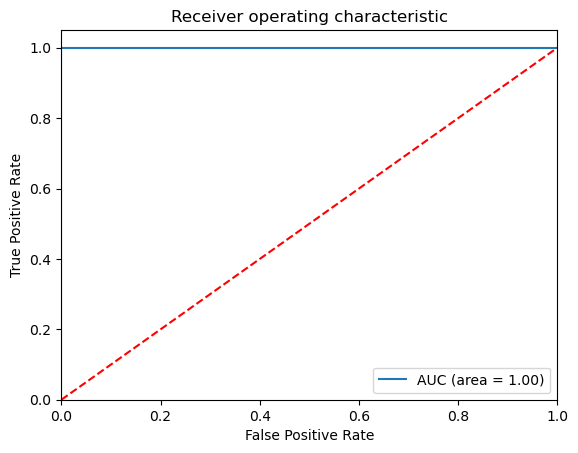

In [159]:
gbm_tuned_roc_auc = roc_auc_score(y_train, pred_gbm_tuned_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_gbm_tuned_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % gbm_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('gbm_tuned_ROC')
plt.show()

Test seti için:

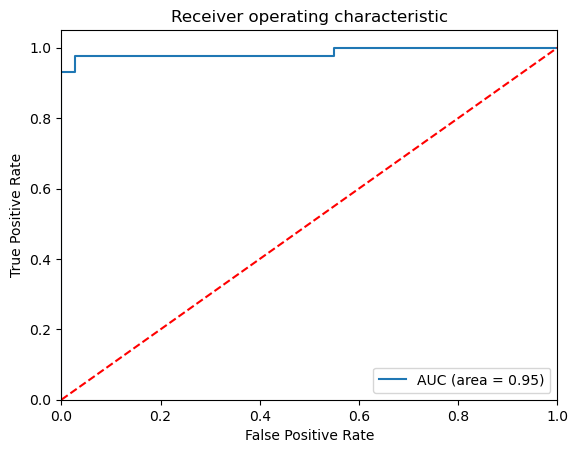

In [160]:
gbm_tuned_roc_auc = roc_auc_score(y_test, pred_gbm_tuned_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_gbm_tuned_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % gbm_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('gbm_tuned_ROC')
plt.show()

Gradient boosting yöntemi uygulamak model preformansında bir değişime neden olmadı

### SINIFLAMA İÇİN XGBOOST YÖNTEMİ

In [161]:
xGBoost_Class = XGBClassifier(random_state=22).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikler:

In [162]:
pred_xgb_train = xGBoost_Class.predict(X_train)
pred_xgb_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [163]:
pred_xgb_train_proba = xGBoost_Class.predict_proba(X_train)
pred_xgb_train_proba[0:10]

array([[2.0751953e-03, 9.9792480e-01],
       [1.9752979e-03, 9.9802470e-01],
       [9.7564340e-02, 9.0243566e-01],
       [9.9949187e-01, 5.0810684e-04],
       [3.9918542e-02, 9.6008146e-01],
       [9.9983335e-01, 1.6662847e-04],
       [9.9929446e-01, 7.0555822e-04],
       [2.4253726e-03, 9.9757463e-01],
       [2.0545721e-04, 9.9979454e-01],
       [9.9613261e-01, 3.8673808e-03]], dtype=float32)

In [164]:
confusion_matrix(y_train, pred_xgb_train)

array([[286,   0],
       [  0, 169]])

In [165]:
accuracy_score(y_train, pred_xgb_train)

1.0

In [166]:
print(classification_report(y_train, pred_xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için tahmin ve metrikler:

In [167]:
pred_xgb_test = xGBoost_Class.predict(X_test)
pred_xgb_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [168]:
pred_xgb_test_proba = xGBoost_Class.predict_proba(X_test)
pred_xgb_test_proba[0:10]

array([[9.8854280e-01, 1.1457228e-02],
       [1.9711256e-04, 9.9980289e-01],
       [2.4884939e-04, 9.9975115e-01],
       [3.9356947e-04, 9.9960643e-01],
       [8.0454028e-01, 1.9545969e-01],
       [9.9984777e-01, 1.5220912e-04],
       [9.9946553e-01, 5.3448929e-04],
       [9.9985695e-01, 1.4304392e-04],
       [9.9898690e-01, 1.0131211e-03],
       [9.9912763e-01, 8.7234390e-04]], dtype=float32)

In [169]:
confusion_matrix(y_test, pred_xgb_test)

array([[71,  0],
       [ 2, 41]])

In [170]:
accuracy_score(y_test, pred_xgb_test)

0.9824561403508771

In [171]:
print(classification_report(y_test, pred_xgb_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Eğitim ve test set için ROC eğrisi çizdirelim:

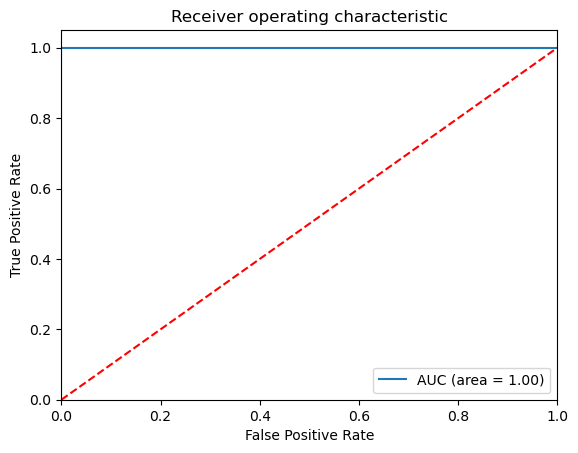

In [172]:
xgb_roc_auc = roc_auc_score(y_train, pred_xgb_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_xgb_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('xgb_ROC')
plt.show()

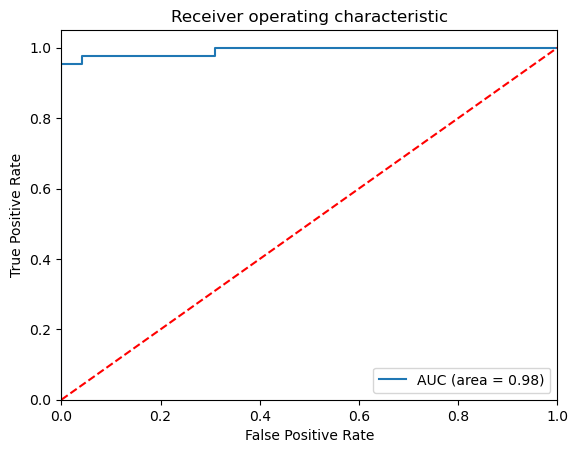

In [173]:
xgb_roc_auc = roc_auc_score(y_test, pred_xgb_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('xgb_ROC')
plt.show()

GridSearch Düzenlemesi yapalım

In [174]:
xGBoost_Class_params = {'n_estimators': [100, 500, 1000],
                        'subsample': [0.6, 0.8, 1],
                        'max_depth': [3,5,7],
                        'learning_rate': [0.1, 0.001, 0.01]}
xGBoost_ClassfCV = XGBClassifier(random_state=22)
xGBoost_Class_CVGS = GridSearchCV(xGBoost_ClassfCV, xGBoost_Class_params,cv = 5,n_jobs=-1,verbose=0).fit(X_train, y_train)

In [175]:
xGBoost_Class_CVGS.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.6}

In [176]:
xGBoost_Class_CVGS.best_score_

0.9692307692307691

In [177]:
xGBoost_Class_Tuned = XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=1000,subsample=0.6,random_state = 22).fit(X_train, y_train)

Eğitim seti için tahmin ve metrikler:

In [178]:
pred_xgb_tuned_train = xGBoost_Class_Tuned.predict(X_train)
pred_xgb_tuned_train[0:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [179]:
pred_xgb_tuned_train_proba = xGBoost_Class_Tuned.predict_proba(X_train)
pred_xgb_tuned_train_proba[0:10]

array([[5.2830577e-03, 9.9471694e-01],
       [6.1064363e-03, 9.9389356e-01],
       [1.4951289e-01, 8.5048711e-01],
       [9.9962699e-01, 3.7301905e-04],
       [8.6403012e-02, 9.1359699e-01],
       [9.9992889e-01, 7.1132323e-05],
       [9.9709433e-01, 2.9056573e-03],
       [4.1328669e-03, 9.9586713e-01],
       [1.2564659e-04, 9.9987435e-01],
       [9.9873972e-01, 1.2602577e-03]], dtype=float32)

In [180]:
confusion_matrix(y_train, pred_xgb_tuned_train)

array([[286,   0],
       [  0, 169]])

In [181]:
accuracy_score(y_train, pred_xgb_tuned_train)

1.0

In [183]:
print(classification_report(y_train, pred_xgb_tuned_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Test seti için tahmin ve metrikler:

In [184]:
pred_xgb_tuned_test = xGBoost_Class_Tuned.predict(X_test)
pred_xgb_tuned_test[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [185]:
pred_xgb_tuned_test_proba = xGBoost_Class_Tuned.predict_proba(X_test)
pred_xgb_tuned_test_proba[0:10]

array([[9.94034708e-01, 5.96531387e-03],
       [1.76370144e-04, 9.99823630e-01],
       [1.31249428e-04, 9.99868751e-01],
       [3.33428383e-04, 9.99666572e-01],
       [9.32308853e-01, 6.76911697e-02],
       [9.99884307e-01, 1.15681716e-04],
       [9.99818683e-01, 1.81346317e-04],
       [9.99913633e-01, 8.63460300e-05],
       [9.99383032e-01, 6.16955687e-04],
       [9.98860300e-01, 1.13970763e-03]], dtype=float32)

In [186]:
confusion_matrix(y_test, pred_xgb_tuned_test)

array([[71,  0],
       [ 2, 41]])

In [187]:
accuracy_score(y_test, pred_xgb_tuned_test)

0.9824561403508771

In [188]:
print(classification_report(y_test, pred_xgb_tuned_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Eğitim ve test set için ROC eğrisi çizdirelim:

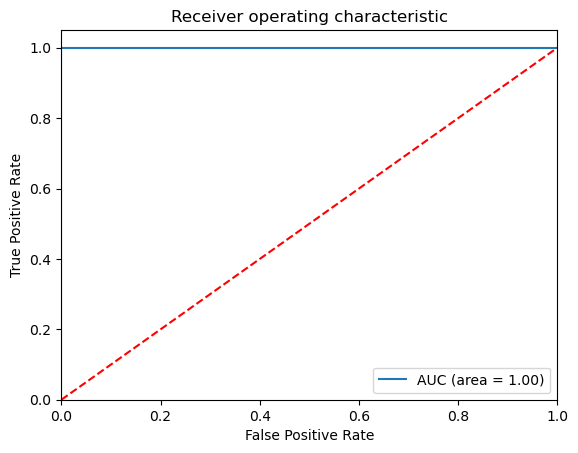

In [189]:
xgb_tuned_roc_auc = roc_auc_score(y_train, pred_xgb_tuned_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_xgb_tuned_train_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('xgb_tuned_ROC')
plt.show()

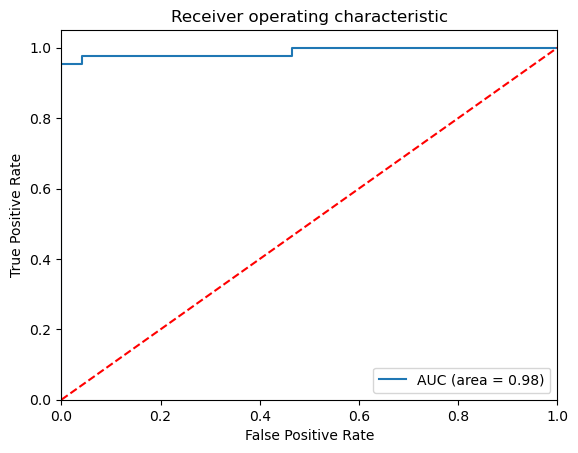

In [190]:
xgb_tuned_roc_auc = roc_auc_score(y_test, pred_xgb_tuned_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_tuned_test_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('xgb_tuned_ROC')
plt.show()

In [191]:
results_df = pd.DataFrame({
    "Model": [
        "Lojistik Regresyon",
        "Karar Ağaçları",
        "KNN",
        "Random Forest",
        "Gradient Boosting",
        "xGBoost"
    ],
    "Test Accuracy": [
        accuracy_score(y_test, pred_lojreg_tuned_test),
        accuracy_score(y_test, pred_dtreeclass_tuned_test),
        accuracy_score(y_test, pred_knn_tuned_test),
        accuracy_score(y_test, pred_rndf_tuned_test),
        accuracy_score(y_test, pred_gbm_tuned_test),
        accuracy_score(y_test, pred_xgb_tuned_test)
    ]
}).sort_values("Test Accuracy", ascending=False).reset_index(drop=True)

results_df

,Model,Test Accuracy
0,xGBoost,0.982456
1,Lojistik Regresyon,0.956140
2,Random Forest,0.956140
3,Gradient Boosting,0.956140
4,Karar Ağaçları,0.947368
5,KNN,0.921053


En iyi accuracy skorunu veren yöntem xGBoost yöntemi çıktı.